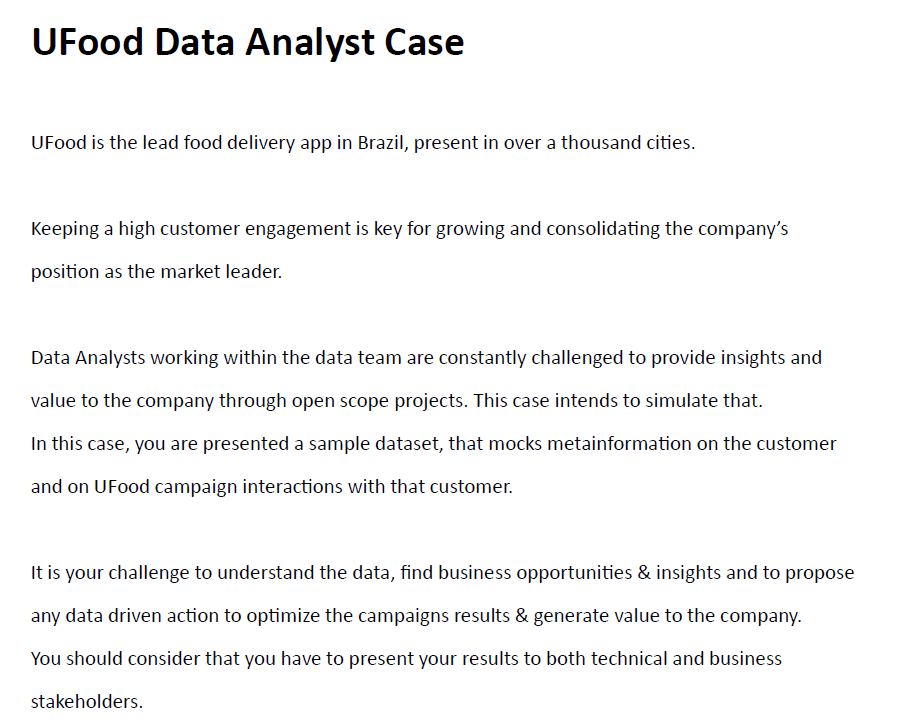
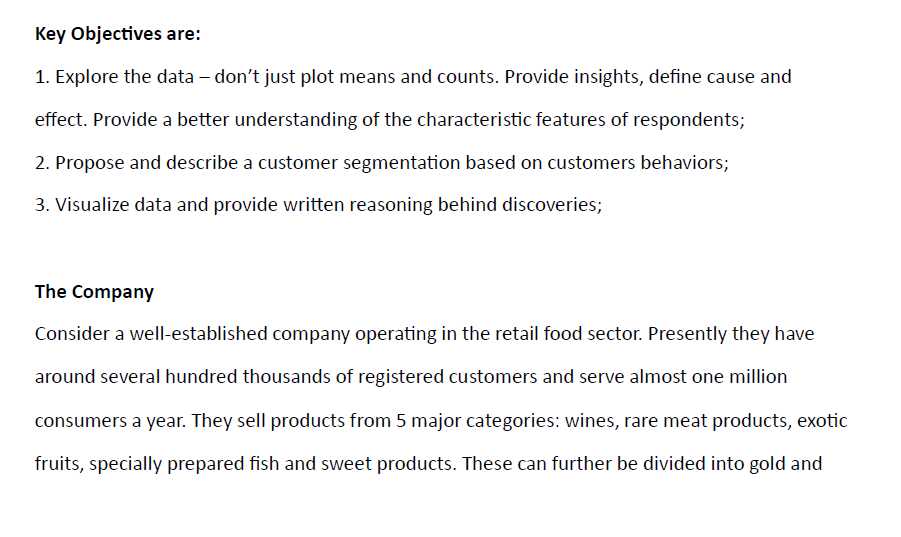
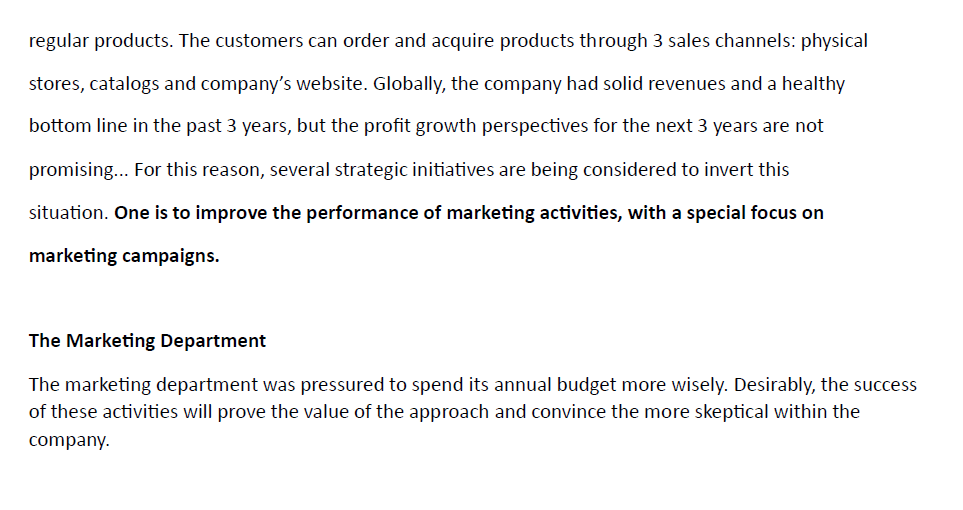

## Data dictionary
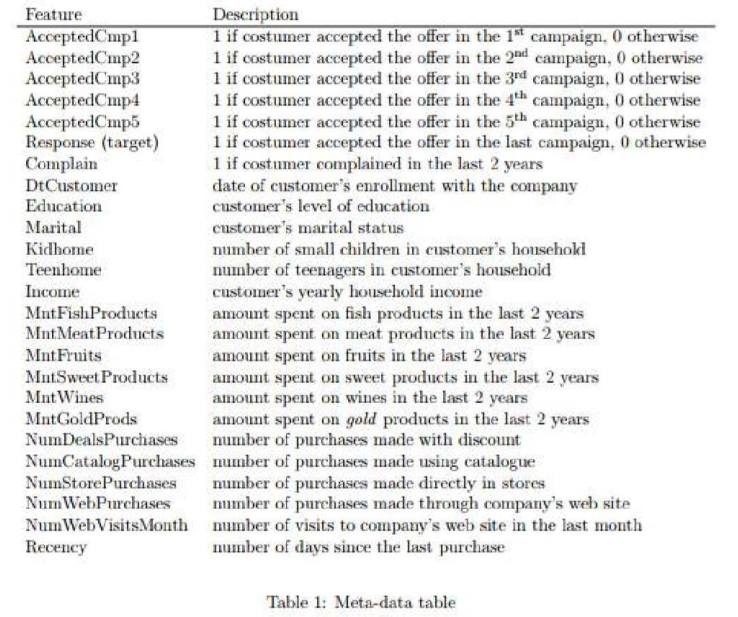

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food = pd.read_csv(r'C:\Users\bende\Desktop\Pandas\u_food_marketing.csv')
pd.set_option('display.max.columns', 45)
food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


## Duplicates

In [3]:
food.drop_duplicates(inplace= True) 
# we deleted ~ 150 rows

## Combining kids and teens together

In [5]:
food['Total children'] = food[['Kidhome', 'Teenhome']].sum(axis=1)
pd.set_option('display.max_colwidth', 12)  # Полностью отображает содержимое ячеек
pd.set_option('display.max_columns', 8)  # Показывает все колонки
pd.set_option('display.width', 17)  # Автоматическая ширина

## Combining marital status (1,2,3,4 and 5)

In [6]:
# for each of these column where we had values 1 or 0, we replaced 1 to 1,2,3,4,5
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [7]:
# then we make a sum of all these in one separate column with a status for all
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)

In [8]:
# Now we are mapping those numeric statuses to string status
food['Marital_Status_str'] = food['Marital_Status'].map({5:'Divorced', 4:'Married', 3:'Single', 2:'Together', 1:'Widow'})

## Combining educational status (1,2,3,4 and 5)

In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

In [10]:
# for each of these column where we had values 1 or 0, we replaced 1 to 1,2,3,4,5
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [11]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

In [12]:
# Now we are mapping those numeric statuses to string status
food['Education_Status_str'] = food['Education_Status'].map({1:'2n Cycle', 2:'Basic', 3:'Graduation', 4:'Master', 5:'PhD'})

## Making one column for any of accepted campaigns 

In [13]:
food['Accepted_Campaigns'] = food[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

## "One is to improve the performance of marketing activities, with a special focus on marketing campaigns."

## Finding correlations of accepted campaigns

In [14]:
# converting 'Accepted_Campaigns' to a column where 1 becomes 
# for any value (1,2 etc)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [15]:
food.corr(numeric_only=True, method='pearson')['Accepted_Campaigns'].sort_values(ascending=False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.714792
Response                0.686288
AcceptedCmp4            0.463804
AcceptedCmp3            0.457291
AcceptedCmp5            0.449056
AcceptedCmp1            0.427119
MntWines                0.418647
MntTotal                0.396330
MntRegularProds         0.394459
NumCatalogPurchases     0.324215
MntMeatProducts         0.302546
Income                  0.295926
NumWebPurchases         0.220552
MntGoldProds            0.188638
AcceptedCmp2            0.183713
MntSweetProducts        0.159904
MntFishProducts         0.152153
NumStorePurchases       0.146054
MntFruits               0.144209
Customer_Days           0.084975
Education_Status        0.067411
education_PhD           0.055422
marital_Single          0.049601
marital_Widow           0.033197
Age                     0.022613
marital_Divorced        0.012142
education_Master        0.004979
Marital_Status         -0.010530
education_Graduation   -0.012701
Complain  

<Axes: >

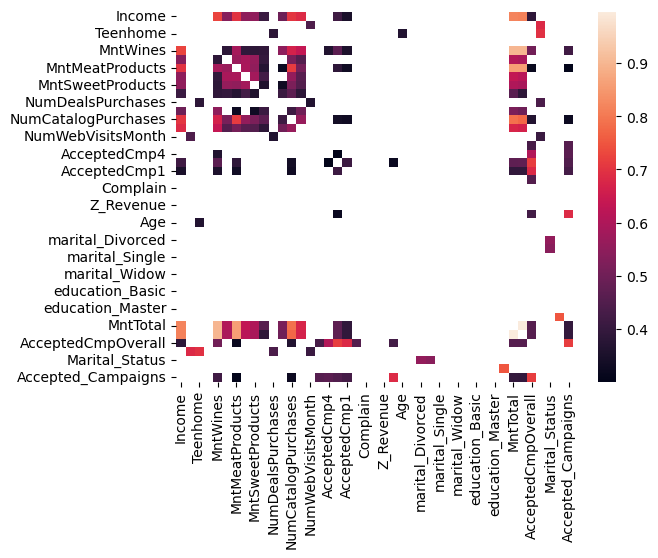

In [16]:
# FINDING NOT SMALL CORRELATIONS

all_correlations = food.corr(numeric_only=True, method='pearson')
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]


sns.heatmap(all_correlations)

In [17]:
all_correlations['Accepted_Campaigns'].sort_values()

MntMeatProducts         0.302546
NumCatalogPurchases     0.324215
MntRegularProds         0.394459
MntTotal                0.396330
MntWines                0.418647
AcceptedCmp1            0.427119
AcceptedCmp5            0.449056
AcceptedCmp3            0.457291
AcceptedCmp4            0.463804
Response                0.686288
AcceptedCmpOverall      0.714792
Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntFruits                    NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Ma

## AGE RANGE

In [18]:
# LIST OF SORTED UNIQUE VALUES OF AGE
sorted(food['Age'].unique())
# sorted(food['Age'].unique()) - SECOND WAY (JUST A LIST, NOT AN ARRAY)

[24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80]

In [19]:
age_groups = [(23,30), (31,40), (41,50), (51,60), (61,70), (71,80)]

# function creates a string with an age group, like "61 - 70" for age 63
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("unknown")

# new column with those groups
food['Age_group'] = food['Age'].apply(assign_age_group)

In [20]:
food[['Age', 'Age_group']].head()

,Age,Age_group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


#### Here we can see, that the percent of people who accept campaigns are greater for people from age groups 23-30 and 71-80, BUT the amount of people of those groups is very low 

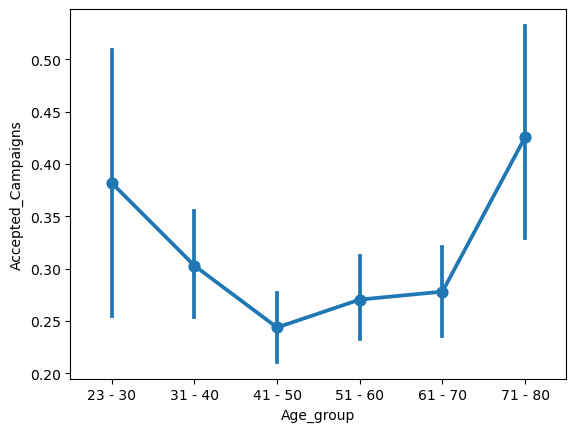

In [21]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80']

sns.pointplot(data = food,x = 'Age_group', y = 'Accepted_Campaigns', order = age_order)
plt.show()

In [22]:
counts = food['Age_group'].value_counts()
counts

Age_group
41 - 50    669
51 - 60    455
61 - 70    421
31 - 40    327
71 - 80     94
23 - 30     55
Name: count, dtype: int64

In [23]:
food.shape[0]

2021

In [24]:
percentage = counts / food.shape[0] * 100
percent_food_ages = percentage.reset_index()
percent_food_ages.columns = ['age_group', 'percentage']
percent_food_ages.sort_values('age_group', inplace=True)
percent_food_ages

,age_group,percentage
5,23 - 30,2.721425
3,31 - 40,16.180109
0,41 - 50,33.102425
1,51 - 60,22.513607
2,61 - 70,20.831272
4,71 - 80,4.651163


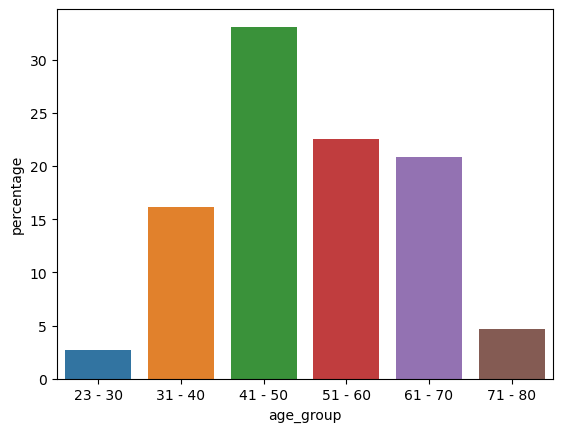

In [25]:
sns.barplot(data = percent_food_ages, x = 'age_group', y = 'percentage', hue = 'age_group')

plt.show()

### Age segmentation - core audience for accepting campaigns right now is 31 -70 years

## Amount spent

In [26]:
grouped_food = food.groupby('Age_group')['MntTotal'].sum().reset_index()
grouped_food

,Age_group,MntTotal
0,23 - 30,42968
1,31 - 40,155050
2,41 - 50,323387
3,51 - 60,266028
4,61 - 70,266829
5,71 - 80,85156


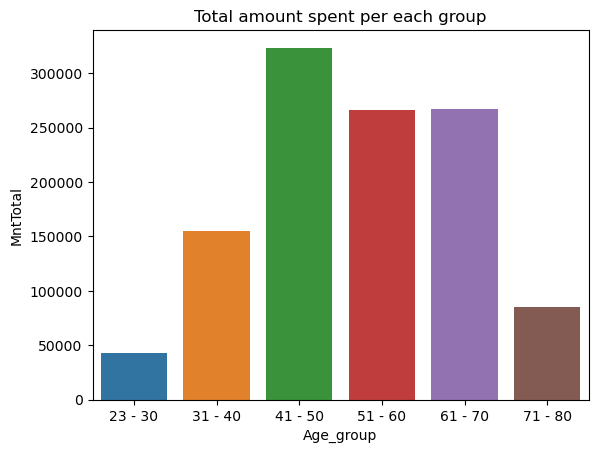

In [27]:
sns.barplot(data = grouped_food, x = 'Age_group', y = 'MntTotal', hue = 'Age_group')
plt.title('Total amount spent per each group')
plt.show()

## Amount spent of those who accepted campaigns

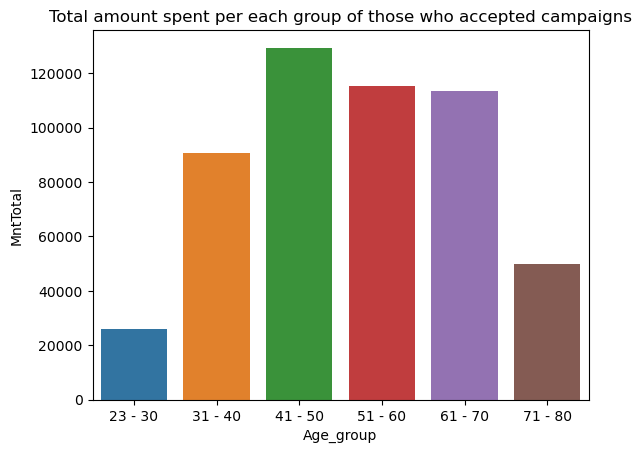

In [28]:
accept_camp = food[food['Accepted_Campaigns'] !=0]

accept_grouped_food = accept_camp.groupby('Age_group')['MntTotal'].sum().reset_index()

sns.barplot(data = accept_grouped_food, x = 'Age_group', y = 'MntTotal', hue = 'Age_group')
plt.title('Total amount spent per each group of those who accepted campaigns')
plt.show()

### Age segmentation - core audience for accepting campaigns right now is 31 -70 years
### 23-30, 71-80 who accepted are at higher range

## Types of purchasing: Web, Catalog and Store

In [29]:
sum_food = pd.DataFrame(food[['NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases']].sum(), columns = ['Sums'])
sum_food =  sum_food.reset_index()
sum_food

,index,Sums
0,NumWebPu...,8317
1,NumCatal...,5345
2,NumStore...,11737


In [30]:
sum_food.rename(columns = {'index': 'Type_Of_Purchase'}, inplace=True)
sum_food

,Type_Of_Purchase,Sums
0,NumWebPu...,8317
1,NumCatal...,5345
2,NumStore...,11737


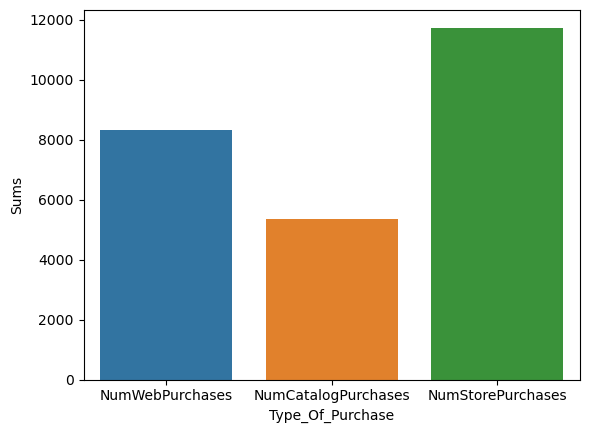

In [31]:
sns.barplot(data = sum_food, x = 'Type_Of_Purchase', y = 'Sums', hue = 'Type_Of_Purchase')
#plt.title('Types of purchasing by all customers')
plt.show()

## Types of purchasing: Web, Catalog and Store for accepted Campaigns

<Axes: xlabel='Type_Of_Purchase', ylabel='Sums'>

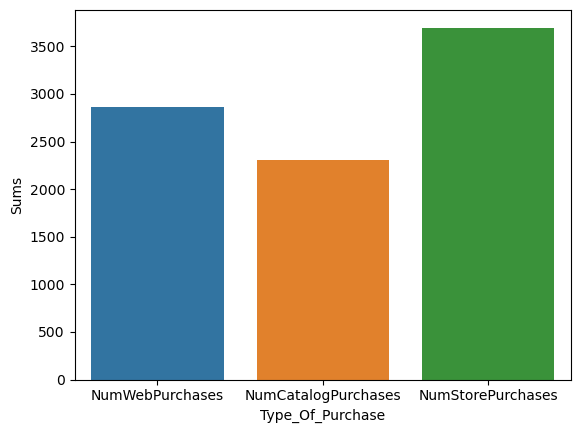

In [32]:
#For accepted only
accept_camp = food[food['Accepted_Campaigns'] !=0]
sum_food = pd.DataFrame(accept_camp[['NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases']].sum(), columns = ['Sums'])
sum_food =  sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_Of_Purchase'}, inplace=True)
sns.barplot(data = sum_food, x = 'Type_Of_Purchase', y = 'Sums', hue = 'Type_Of_Purchase')


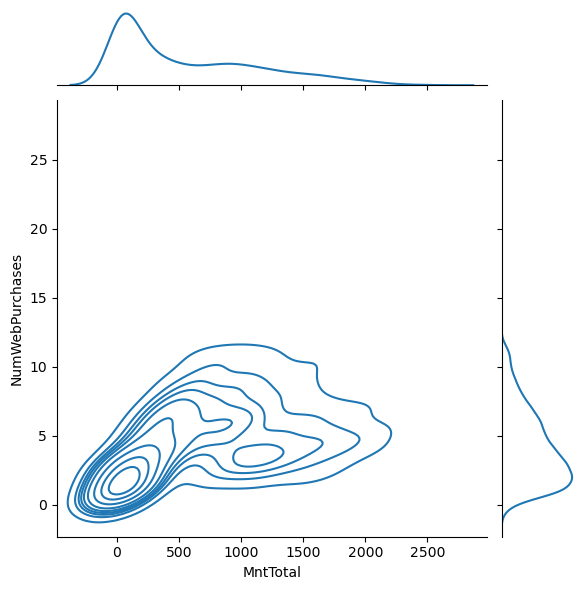

In [33]:
sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')

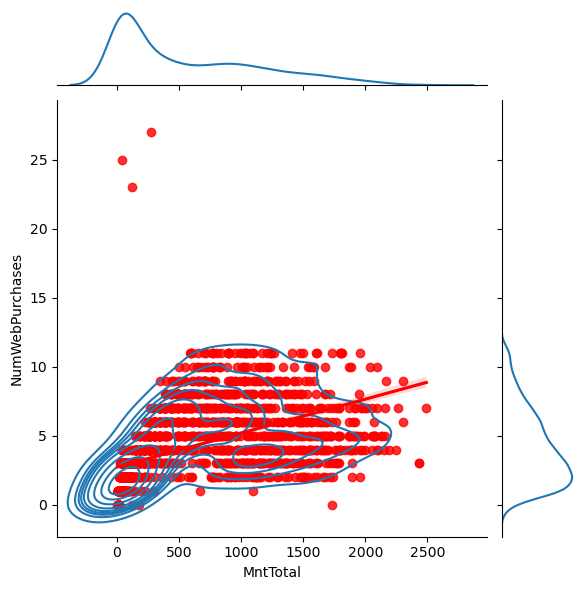

In [34]:
# adding plot with outliers and actual values
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

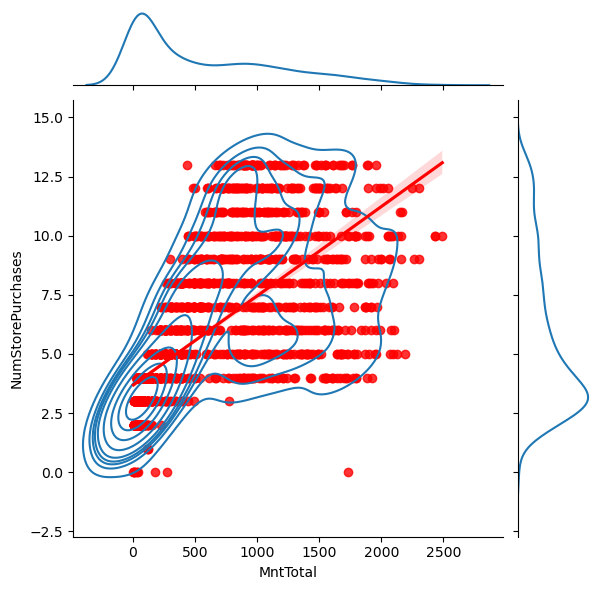

In [35]:
# adding plot with outliers and actual values
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')

## 2 directions: Boost up the higher rpercentage catalog customers. Or focus In Store/WEB becase they have more traffic

## Regression: Total Children vs. spending

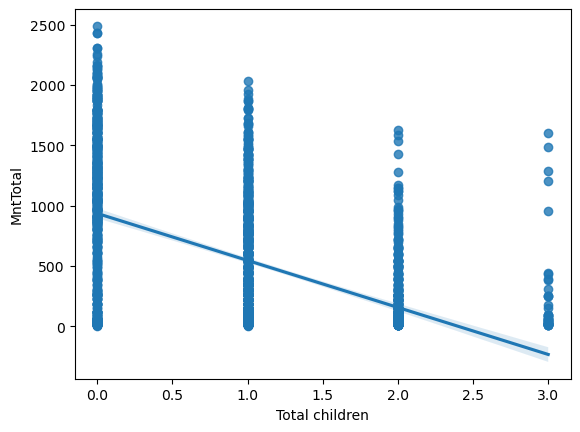

In [36]:
sns.regplot(x = 'Total children', y = 'MntTotal', data = food)
plt.show()

### People who haver more children are spending less money

## Regression: Total Children vs. Accepted campaigns

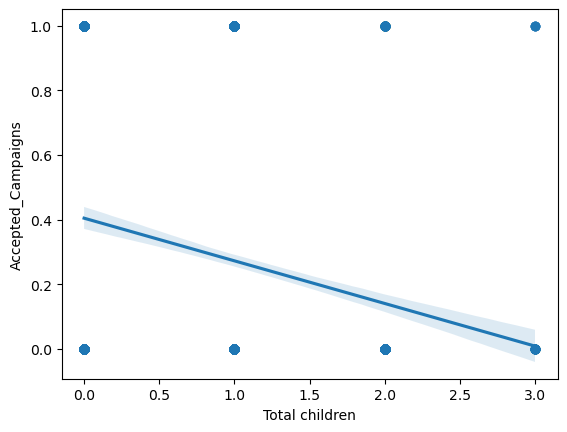

In [37]:
sns.regplot(x = 'Total children', y = 'Accepted_Campaigns', data = food)
plt.show()

### The less children the more accepted campains

## Regression: Total Children vs. Accepted campaigns

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

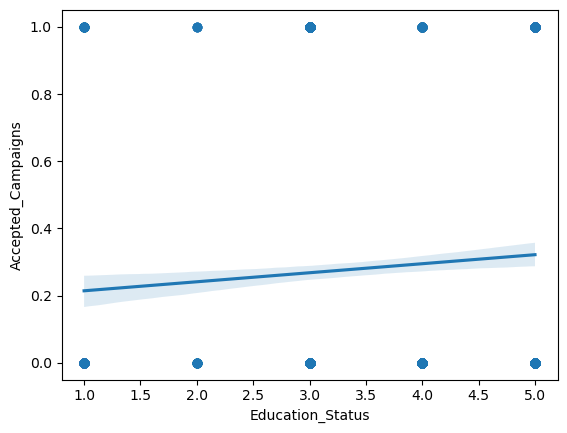

In [38]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)


### The more education people have more likely they accept a campaign

## Customers by Marital Status

<Axes: xlabel='Marital_Status_str', ylabel='count'>

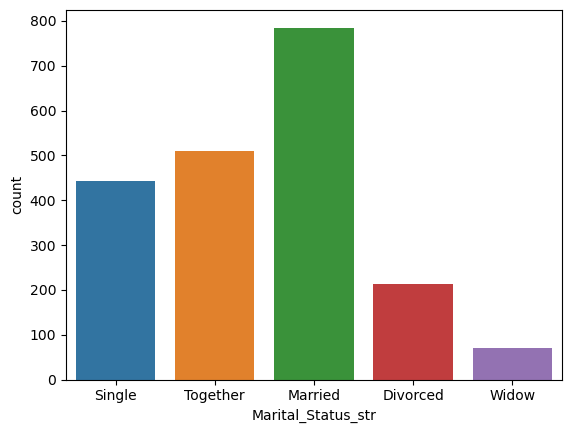

In [39]:
sns.countplot(x = 'Marital_Status_str', data = food, hue='Marital_Status_str')

## Total spent by Marital Status

In [40]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
rel_food

,Marital_Status_str,MntTotal
0,Divorced,120959
1,Married,431445
2,Single,251580
3,Together,286887
4,Widow,48547


<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

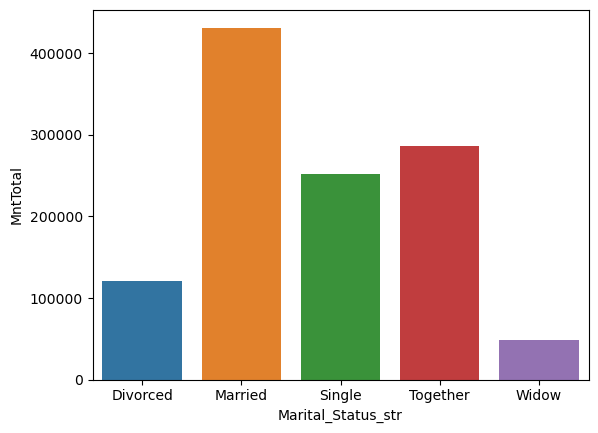

In [41]:
sns.barplot(x='Marital_Status_str', y = 'MntTotal', data = rel_food, hue = 'Marital_Status_str')

## Married, single, together spend much more money

# Overall Findings

1. **Age 30-70** – Spend more money but are less likely to accept campaigns. However, they are a large group.
2. **Catalog** – More likely to accept campaigns, but in-person shoppers spend more.  
   - Suggested split: **40% catalog, 30% store, 30% web**.
3. **Focus on people with no kids (or fewer kids).**
4. **Education** – No significant impact. No need to target specific groups.
5. **Marital status** – Doesn't matter much. Married, single, or in a relationship – they all spend similarly.

## Best Strategies  

### High-Spending Users  
- **Middle-aged, high earners, no kids.** Target them on different platforms with the split above.

### New Users to Spend More  
- **Ages 21-30 and 70+** – More likely to accept campaigns. Focus on them.